<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week13/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#LeNet5

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [3]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# LeNet-5 Model Definition
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [6]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 90344075.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97454299.13it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23971063.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6333287.49it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [8]:
# Initialize LeNet-5 model, criterion, and optimizer
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_train_loss = running_loss / len(train_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_train_loss:.4f}")

Epoch [1/5], Loss: 0.2710
Epoch [2/5], Loss: 0.0732
Epoch [3/5], Loss: 0.0525
Epoch [4/5], Loss: 0.0396
Epoch [5/5], Loss: 0.0332


In [10]:
# Testing loop
model.eval()
test_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

average_test_loss = test_loss / len(test_loader)
accuracy = correct_predictions / total_samples

print(f"\nTest Loss: {average_test_loss:.4f}, Accuracy: {accuracy*100:.2f}%")


Test Loss: 0.0362, Accuracy: 98.86%


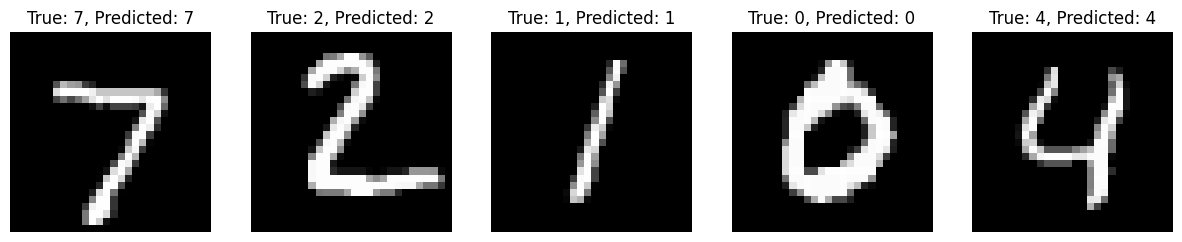

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set model ke mode evaluasi
model.eval()

# Mendapatkan satu batch data uji
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Membuat prediksi dengan model
with torch.no_grad():
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

# Menampilkan beberapa gambar dengan label dan prediksi
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    # Menampilkan gambar
    image = images[i].cpu().numpy().squeeze()
    axes[i].imshow(image, cmap='gray')

    # Menampilkan label sebenarnya dan prediksi
    true_label = labels[i].item()
    predicted_label = predictions[i].item()
    title = f'True: {true_label}, Predicted: {predicted_label}'
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()